In [45]:
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from numpy import where
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [46]:
df_showcase = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv',)
df_showcase

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [47]:
df = pd.read_csv('Fleur_SandboxSet.csv')

samples,attributes = df.shape
print('\nNo of Samples: {0} and No of Features: {1}'.format(samples,attributes))


No of Samples: 856 and No of Features: 24


In [48]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,...,STDs (number),STDs:condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Target
0,0,0,18,4.0,15.0,1.0,0.0,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
1,1,1,15,1.0,14.0,1.0,0.0,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,2,34,1.0,17.0,1.0,0.0,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
3,3,3,52,5.0,16.0,4.0,1.0,37.00,37.0,1.0,...,0,0.0,0.0,0.0,0,1,0,1,0,0
4,4,4,46,3.0,21.0,4.0,0.0,0.00,0.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
5,5,5,42,3.0,23.0,2.0,0.0,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
6,6,6,51,3.0,17.0,6.0,1.0,34.00,3.4,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,1
7,7,7,26,1.0,26.0,3.0,0.0,0.00,0.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
8,8,8,45,1.0,20.0,5.0,0.0,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0,1,0,1,1,0
9,9,9,44,3.0,15.0,2.0,1.0,1.27,2.8,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0


In [49]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)

In [50]:
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs (number),STDs:condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Target
0,18,4.0,15.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.00,37.0,1.0,3.0,0.0,...,0,0.0,0.0,0.0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.00,0.0,1.0,15.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.00,3.4,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,1
7,26,1.0,26.0,3.0,0.0,0.00,0.0,1.0,2.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,1,0,1,1,0
9,44,3.0,15.0,2.0,1.0,1.27,2.8,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,0


In [51]:
attributeList = df.columns

print('\nColumns in Dataframe and their Imported Data Type:\n')
for i in range(len(attributeList.values)):
    print('Column {0} is \'{1}\' and of data type: {2}'.format(i+1,attributeList.values[i],df[attributeList.values[i]].dtype))


Columns in Dataframe and their Imported Data Type:

Column 1 is 'Age' and of data type: int64
Column 2 is 'Number of sexual partners' and of data type: float64
Column 3 is 'First sexual intercourse' and of data type: float64
Column 4 is 'Num of pregnancies' and of data type: float64
Column 5 is 'Smokes' and of data type: float64
Column 6 is 'Smokes (years)' and of data type: float64
Column 7 is 'Smokes (packs/year)' and of data type: float64
Column 8 is 'Hormonal Contraceptives' and of data type: float64
Column 9 is 'Hormonal Contraceptives (years)' and of data type: float64
Column 10 is 'IUD' and of data type: float64
Column 11 is 'IUD (years)' and of data type: float64
Column 12 is 'STDs' and of data type: float64
Column 13 is 'STDs (number)' and of data type: int64
Column 14 is 'STDs:condylomatosis' and of data type: float64
Column 15 is 'STDs:syphilis' and of data type: float64
Column 16 is 'STDs:HIV' and of data type: float64
Column 17 is 'STDs: Number of diagnosis' and of data t

In [52]:
print(f"\nThe mean of the dataframe is:\n\n {df.mean()}")
print(f"\nThe median of the dataframe is:\n\n {df.median()}")
print(f"\nThe mode of the dataframe is:\n\n {df.mode()}")


The mean of the dataframe is:

 Age                                26.835280
Number of sexual partners           2.467290
First sexual intercourse           17.004673
Num of pregnancies                  2.259346
Smokes                              0.142523
Smokes (years)                      1.198259
Smokes (packs/year)                 0.441402
Hormonal Contraceptives             0.657710
Hormonal Contraceptives (years)     2.300911
IUD                                 0.108645
IUD (years)                         0.499381
STDs                                0.091121
STDs (number)                       0.153037
STDs:condylomatosis                 0.050234
STDs:syphilis                       0.021028
STDs:HIV                            0.021028
STDs: Number of diagnosis           0.086449
Dx:Cancer                           0.021028
Dx:CIN                              0.010514
Dx:HPV                              0.021028
Dx                                  0.028037
Target                

In [53]:
#Check How many attributes are missing information

print('\n~~Checking for Samples with Missing Data~~\n')
print('Total Number of Samples is:',samples,'\n')
attributesWithMissingValues=0
# incomeDataFrame=incomeDataFrame.replace('?',pd.NA)

for i in range(len(attributeList)):
    dataCount = df[attributeList[i]].count()
    if samples-dataCount>0:
        print("No of Samples in data set with missing attribute '{0}' are: {1}".format(attributeList[i],samples-dataCount))
        attributesWithMissingValues+=1

print("\nNo of Columns that have missing values:",attributesWithMissingValues)


~~Checking for Samples with Missing Data~~

Total Number of Samples is: 856 


No of Columns that have missing values: 0


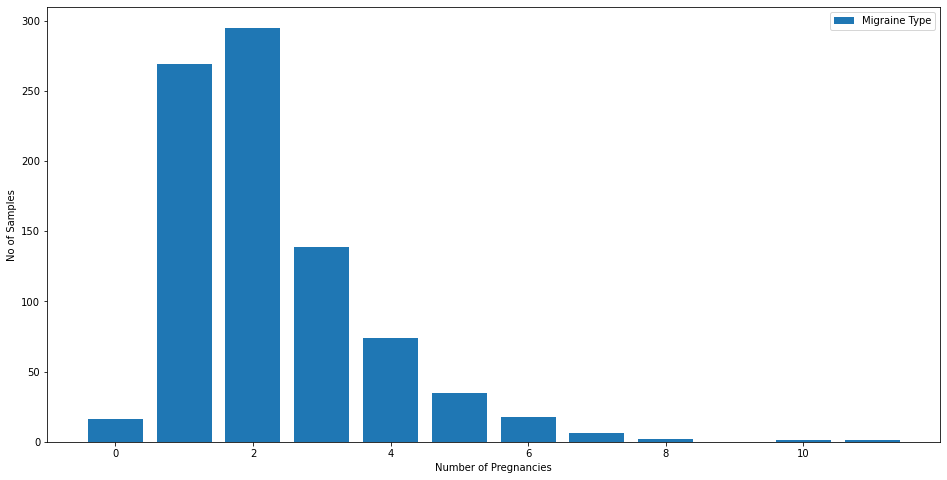

In [54]:
# d=df1['Num of pregnancies'].value_counts()
# d1=df1['STDs: Number of diagnosis'].value_counts()
# x=d1.values
# y=d.values

d=df['Num of pregnancies'].value_counts()
x=d.index.values
y=d.values

plt.figure(figsize=(16,8))
plt.bar(x,y,label='Migraine Type')
plt.xlabel('Number of Pregnancies')
plt.ylabel('No of Samples')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Number of sexual partners', ylabel='Hormonal Contraceptives'>

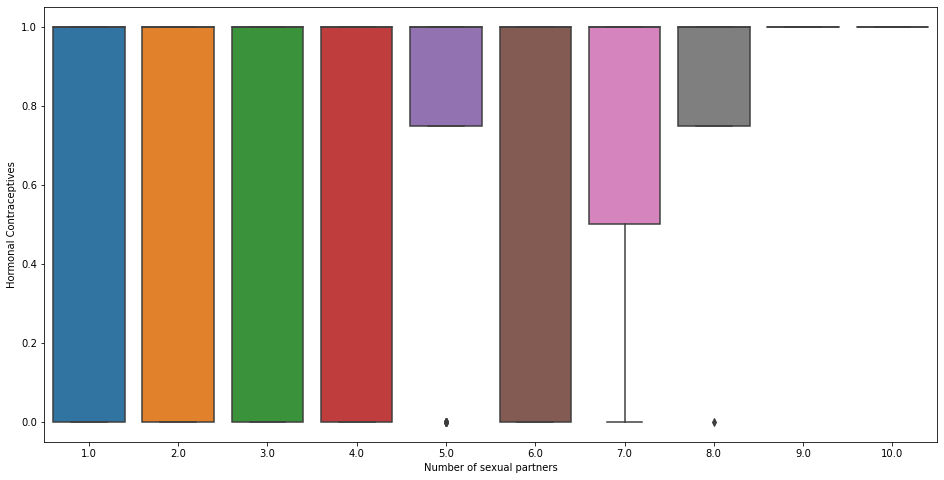

In [55]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['Number of sexual partners'], y= df['Hormonal Contraceptives'], data=df)

C:\Users\ngoa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

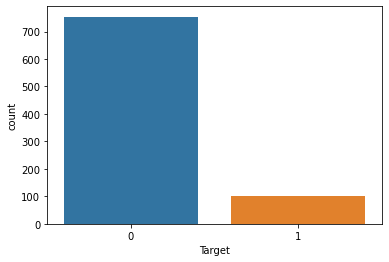

In [56]:
sns.countplot(df['Target'])

In [57]:
X=df.drop('Target',axis=1)
Y1=df['Target']

Counter({0: 754, 1: 102})
Counter({0: 754, 1: 754})


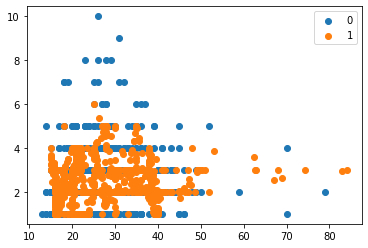

In [58]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X = df.drop('Target',axis=1).values
y = df['Target'].values
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X.shape

(1508, 21)

In [61]:
y.shape

(1508,)

In [62]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X, 
                                                  y, 
                                                  test_size=0.2, 
                                                  random_state=123)

In [63]:
print(f"Shape of Y1_train is {Y1_train.shape}")
print(f"Shape of X_train is {X_train.shape}")

Shape of Y1_train is (1206,)
Shape of X_train is (1206, 21)


In [64]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# tf.random.set_seed(123)
neuralNetworkModel = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')])

neuralNetworkModel.compile(optimizer=opt,
                           loss='binary_crossentropy',
                          metrics=['accuracy',tf.keras.metrics.Precision(name='precision')])
trainingResults = neuralNetworkModel.fit(X_train,Y1_train,validation_data=(X_test,Y1_test),batch_size=30,epochs=50,shuffle=True)

Epoch 1/50
41/41 [==============================] - 1s 9ms/step - loss: 0.6993 - accuracy: 0.5514 - precision: 0.5499 - val_loss: 0.7709 - val_accuracy: 0.4636 - val_precision: 0.5000
Epoch 2/50
41/41 [==============================] - 0s 5ms/step - loss: 0.6791 - accuracy: 0.5688 - precision: 0.5849 - val_loss: 0.6595 - val_accuracy: 0.6126 - val_precision: 0.6991
Epoch 3/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.5647 - precision: 0.5938 - val_loss: 0.6325 - val_accuracy: 0.7119 - val_precision: 0.7168
Epoch 4/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6520 - accuracy: 0.5978 - precision: 0.5873 - val_loss: 0.6130 - val_accuracy: 0.6490 - val_precision: 0.7545
Epoch 5/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6339 - accuracy: 0.6186 - precision: 0.6493 - val_loss: 0.6077 - val_accuracy: 0.6291 - val_precision: 0.7660
Epoch 6/50
41/41 [==============================] - 0s 5ms/step - loss: 0.6071 -

41/41 [==============================] - 0s 4ms/step - loss: 0.2962 - accuracy: 0.8715 - precision: 0.8867 - val_loss: 0.5705 - val_accuracy: 0.8278 - val_precision: 0.8618
Epoch 46/50
41/41 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.8516 - precision: 0.8655 - val_loss: 0.5458 - val_accuracy: 0.8013 - val_precision: 0.9048
Epoch 47/50
41/41 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.8698 - precision: 0.8919 - val_loss: 0.5365 - val_accuracy: 0.8311 - val_precision: 0.8364
Epoch 48/50
41/41 [==============================] - 0s 5ms/step - loss: 0.3166 - accuracy: 0.8516 - precision: 0.8748 - val_loss: 0.4687 - val_accuracy: 0.8013 - val_precision: 0.8750
Epoch 49/50
41/41 [==============================] - 0s 5ms/step - loss: 0.2966 - accuracy: 0.8690 - precision: 0.8729 - val_loss: 0.4971 - val_accuracy: 0.7980 - val_precision: 0.8855
Epoch 50/50
41/41 [==============================] - 0s 6ms/step - loss: 0.3061 - accur

In [65]:
neuralNetworkModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               11264     
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)               

In [66]:
trainingAccuracy = neuralNetworkModel.evaluate(X_train,Y1_train,verbose=0)
testingAccuracy = neuralNetworkModel.evaluate(X_test,Y1_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.8938640356063843

Test Accuracy:  0.8543046116828918


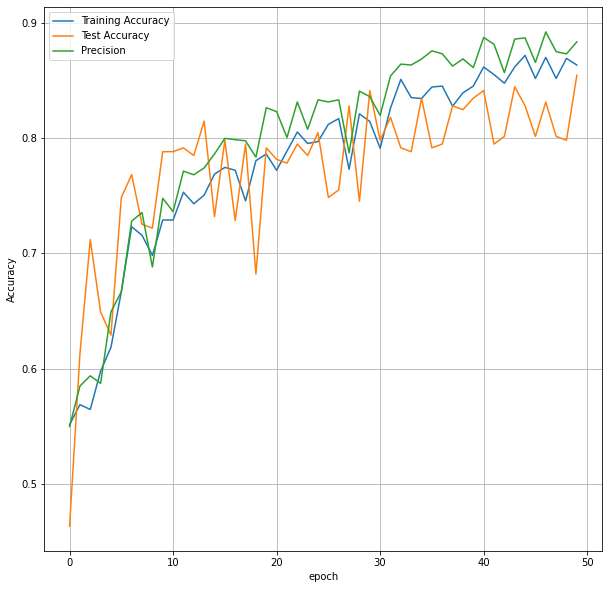

In [67]:
plt.figure(figsize=(10,10))
plt.plot(trainingResults.history['accuracy'], label='Training Accuracy')
plt.plot(trainingResults.history['val_accuracy'], label='Test Accuracy')
plt.plot(trainingResults.history['precision'], label='Precision')
# plt.plot(trainingResults.history['loss'], label='Loss')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [68]:
from sklearn.metrics import roc_curve
y_pred_keras = neuralNetworkModel.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y1_test, y_pred_keras)

In [69]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

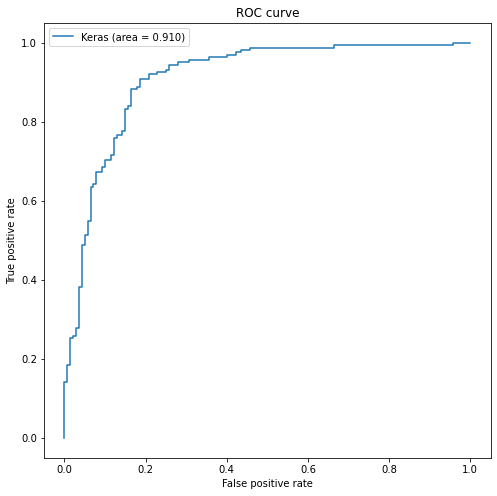

In [70]:
plt.figure(figsize=(8,8))
plt.plot(fpr_keras, tpr_keras,label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()